# **Cats and Dogs image classification**

The dataset comprises over a thousand images sourced from Google Images, featuring a variety of cats and dogs. The objective at hand is to develop a robust classification model capable of accurately distinguishing between images containing cats and those containing dogs.

In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt


* Create a new notebook for working out the data loader and augmentation (`DataLoader.ipynb`).
    * Follow the Keras examples and this notebook.
    * Setup the dataset for a demonstration of transfer learning
        * Perform any cleaning necessary, like throwing out bad images.
            * This will be specific to your dataset.
            * You may discover a problem later, come back and eliminate the bad images here.
        * Select at most 5 classes. Discard the rest of the data.
        * Create a smaller subset of less 100 images per class for training and testing.
        * Figure out how the labels are provided and create a data loader to load the data.
            * If the images are separated into subdirectories, the example above works.
            * If the image information is in a CSV file, easist path is to figure out the way to separate your classes into subdirectories and use the above example.
    * Visualize the images, making sure the data loader is working properly.
    * Create a module which holds the data loader and any other code you may need to reuse.

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  77.0M      0  0:00:10  0:00:10 --:--:-- 79.5M


We are downloading the data here. Note that it's commented out because we only need to do this once.

We also only need to unzip once.

In [4]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


In [5]:
!ls PetImages

Cat  Dog


And we only need to delete the extra images only once.

In [ ]:
#  num_skipped = 0
# for folder_name in ("Cat", "Dog"):
#     max_images = 100
#     folder_path = os.path.join("PetImages", folder_name)
#     for image_i,fname in enumerate(os.listdir(folder_path)):
#         fpath = os.path.join(folder_path, fname)
#         try:
#             fobj = open(fpath, "rb")
#             is_jfif = b"JFIF" in fobj.peek(10)
#         finally:
#             fobj.close()

#         if image_i > max_images or not is_jfif:
#             num_skipped += 1
#             # Delete corrupted image
#             os.remove(fpath)

# print(f"Deleted {num_skipped} images.")

Note the image size change:

In [8]:
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


2 Classes:

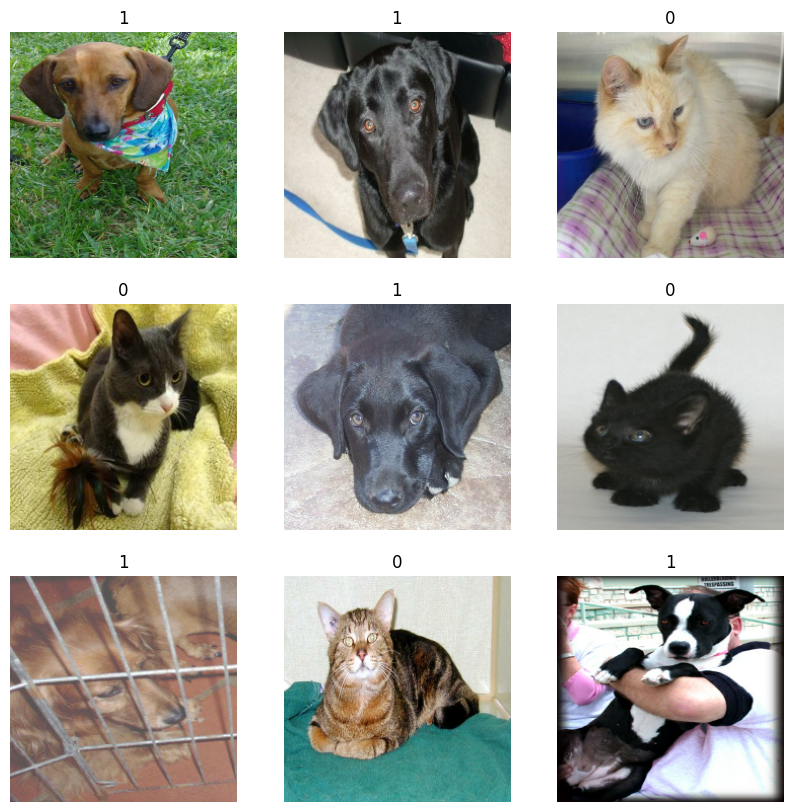

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
def load_image_dataset(directory):
    train_ds = image_dataset_from_directory(
        directory,
        validation_split=0.2,
        subset="training",
        seed=1337,
        image_size=(224, 224),
        batch_size=32,
        class_names= None # Specify the class names
    )

    val_ds = image_dataset_from_directory(
        directory,
        validation_split=0.2,
        subset="validation",
        seed=1337,
        image_size=(224, 224),
        batch_size=32,
        class_names= None  # Specify the class names
    )

    return train_ds, val_ds

In [10]:
def show_images(dataset, class_names=None, num_images=None):
    plt.figure(figsize=(15, 15))  # Increase the figure size for better visualization
    images_shown = 0
    num_cols = 3  # Number of columns per row
    for images, labels in dataset:
        for i in range(images.shape[0]):
            if num_images is not None and images_shown >= num_images:
                break
            num_rows = (images_shown // num_cols) + 1  # Calculate the number of rows needed
            plt.subplot(num_rows, num_cols, images_shown + 1)  # Adjust the subplot grid
            plt.imshow(images[i].numpy().astype("uint8"), aspect='equal')  # Preserve aspect ratio
            if class_names is not None:
                plt.title(class_names[int(labels[i])])  # Display class names
            else:
                plt.title(int(labels[i]))  # Display integer labels (0 or 1)
            plt.axis("off")
            images_shown += 1
    plt.show()